In [1]:
import numpy as np 
import pandas as pd
import allel
import malariagen_data
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import locusPocus
from locusPocus import log

## Coeae1f region haplotype clustering

In [2]:
ag3 = malariagen_data.Ag3(pre=True)

### Load sample_sets

Which populations do we want to look at?

In [3]:
sample_sets = [
    # Ag1000G phase 3 sample sets in Ag3.0
    "AG1000G-GH", 
    'AG1000G-ML-A',
     'AG1000G-BF-A',
     'AG1000G-BF-B',
     'AG1000G-GN-A',
     'AG1000G-GN-B',
    'AG1000G-TZ',
    # Amenta-Etego sample sets in Ag3.3
    # GAARDIAN sample set in Ag3.4
    '1244-VO-GH-YAWSON-VMF00149',
    # GAARD Ghana sample set in Ag3.2
     "1244-VO-GH-YAWSON-VMF00051",
     '1245-VO-CI-CONSTANT-VMF00054',
     '1253-VO-TG-DJOGBENOU-VMF00052',
     '1237-VO-BJ-DJOGBENOU-VMF00050'
]

contig= '2L'

coeae1f_start = 28_545_396
coeae1f_end = 28_547_938
coeae2f_start = 28_548_433
coeae2f_end = 28_550_748

coeregion = '2L:28520000-28580000'

transcript= "AGAP006227-RA"
gene = transcript.replace("-RA", "")

min_cohort_size = 70
cut_height = 1
sample_query = None #"aim_species == 'gambiae'"

In [4]:
meta = ag3.sample_metadata(sample_sets)

Load sample metadata:   0%|          | 0/12 [00:00<?, ?it/s]

In [5]:
meta.taxon.value_counts().to_frame()

,taxon
gambiae,1142
coluzzii,1041
arabiensis,228
gcx3,11
intermediate_gambiae_coluzzii,9


### Load metadata and haplotypes

In [41]:
ds_haps = ag3.haplotypes(region=f"{contig}:{coeae1f_start}-{coeae2f_end}", sample_sets=sample_sets, analysis='gamb_colu_arab')
names = ds_haps['sample_id'].values
pos = allel.SortedIndex(ds_haps['variant_position'])
metahaps, query_bool = locusPocus.load_metahaps(sample_sets, names, sample_query=sample_query)
haps = allel.GenotypeArray(ds_haps['call_genotype'].isel(samples=query_bool).compute()).to_haplotypes()

assert metahaps.shape[0] == haps.shape[1], "Wrong shape Dude!!"

print(haps.shape)
print(metahaps.shape)

(1921, 4862)
(4862, 27)


Load cluster metadata and reorder to fit with haplotype clustering below. 

Recluster haplotypes of larger region

In [ ]:
cluster_spans, leaves = locusPocus.fig_haplotypes_clustered(haps, 
                                                          truncate_distance=0,
                                                          cut_height=cut_height,
                                                          dpi=150, label_clusters=False)

leaf_order = locusPocus.flatten_list(leaves)
assert len(leaf_order) == metahaps.shape[0], "Wrong shape!!"

In [35]:
log("retrieving haplotype clusters and spans")
# get clusters and make palettes
spans = {}
for i, c in enumerate(cluster_spans):
    s= c[2].shape[0]
    if s > min_cohort_size:
        spans[i] = np.array([c[2][0], c[2][-1]])
cluster_start_stop = [np.array([np.where(leaf_order == c[0])[0][0], np.where(leaf_order == c[1])[0][0]]) for c in spans.values()]

clusters_df = pd.read_csv("../../results/haplotype_clusters_metadata.tsv", sep="\t", index_col=0)
palette = clusters_df.iloc[[5,0,2,1,4,3], :]['palette'].to_list()

retrieving haplotype clusters and spans


Lets load the haplotype data, and load the haplotype metadata. Its important to check the order of the metadata matches the haplotypes at each stage, particularly as we re-order the haplotype metadata based on the heirarchical clustering.

In [40]:
id_order = metahaps['sample_id'].to_list()
id_order_clustered = metahaps.iloc[leaf_order, :]['sample_id'].to_list()
locusPocus.check_order(metahaps, id_order)

correct order


Extract a pandas dataframe of the haplotypes at the amino acid positions of interest

In [27]:
log("aligning haplotype calls to amino acids")
df_snps_227 = locusPocus.align_haps_aa(haps, pos, transcript, sample_sets, sample_query=sample_query)
haps_df_227 = locusPocus.haplotypes_to_aa_pandas(ds_haps, df_snps_227, sample_sets, names, myquery="max_af > 0.05 & effect == 'NON_SYNONYMOUS_CODING'", reverse=True)
haps_df_227 = haps_df_227.iloc[:, leaf_order]

df_snps_228 = locusPocus.align_haps_aa(haps, pos, "AGAP006228-RA", sample_sets, sample_query=sample_query)
haps_df_228 = locusPocus.haplotypes_to_aa_pandas(ds_haps, df_snps_228, sample_sets, names, myquery="max_af > 0.05 & effect == 'NON_SYNONYMOUS_CODING'", reverse=False)
haps_df_228 = haps_df_228.iloc[:, leaf_order]

aligning haplotype calls to amino acids
remapping haplotype alleles 0-3
Computing snp allele frequencies


Load SNP genotypes:   0%|          | 0/106 [00:00<?, ?it/s]

Compute allele frequencies:   0%|          | 0/35 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/7629 [00:00<?, ?it/s]

intersecting haplotypes and allele frequency data
There are total 22 amino acid changes with max_af > 0.05 & effect == 'NON_SYNONYMOUS_CODING'
In the haplotype data, there are 22 amino acid changes with max_af > 0.05 & effect == 'NON_SYNONYMOUS_CODING'
remapping haplotype alleles 0-3
Computing snp allele frequencies


Load SNP genotypes:   0%|          | 0/106 [00:00<?, ?it/s]

Compute allele frequencies:   0%|          | 0/35 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/6948 [00:00<?, ?it/s]

intersecting haplotypes and allele frequency data
There are total 21 amino acid changes with max_af > 0.05 & effect == 'NON_SYNONYMOUS_CODING'
In the haplotype data, there are 21 amino acid changes with max_af > 0.05 & effect == 'NON_SYNONYMOUS_CODING'


In [29]:
# haps_df_227, non_synon_bool227 = locusPocus.load_multiallelic_haplotypes(sample_sets=sample_sets, 
#                                         path_to_multi_vcf="../../results/phasing/coeae1f.phasedMulti.vcf",
#                                        contig='2L', start=coeae1f_start, end=coeae1f_end)
# haps_df_227 = haps_df_227.iloc[non_synon_bool227, leaf_order]
# haps_df_227 = haps_df_227.iloc[::-1]
# maf_filter = haps_df_227.apply(np.count_nonzero, axis=1) / haps_df_227.shape[1] > 0.05
# haps_df_227 = haps_df_227[maf_filter].replace(2,1).replace(3,1).droplevel(0)

# haps_df_228, non_synon_bool228 = locusPocus.load_multiallelic_haplotypes(sample_sets=sample_sets, 
#                                         path_to_multi_vcf="../../results/phasing/coeae1f.phasedMulti.vcf",
#                                        contig='2L', start=coeae2f_start, end=coeae2f_end)
# haps_df_228 = haps_df_228.iloc[non_synon_bool228, leaf_order]
# maf_filter = haps_df_228.apply(np.count_nonzero, axis=1) / haps_df_228.shape[1] > 0.05
# haps_df_228 = haps_df_228[maf_filter].replace(2,1).replace(3,1).droplevel(0)

Extract the order of the sample_sets, and load karyotype data and merge with metadata, for plotting.

In [43]:
pop_column = 'country'
pop_order = metahaps.iloc[leaf_order, :][pop_column]
pop_order = pop_order.to_frame()
pop_colours = locusPocus.get_colour_dict(pop_order[pop_column])

bars = {}
for k,v in pop_colours.items():
    bars[k] = plt.Rectangle((0,0),1,1,fc=v, edgecolor = 'none')


sp_df = metahaps.iloc[leaf_order, :]['taxon'].to_frame().copy()
sp_colours_dict = {'gambiae':'dodgerblue', 
                       'coluzzii':'indianred', 
                       'arabiensis':'#03fcc2', 
                       'intermediate_gambiae_coluzzii':'grey',
                       'gcx3':'brown'}
sp_df = sp_df.replace(sp_colours_dict)

bars_sp = {}
for k,v in sp_colours_dict.items():
    bars_sp[k] = plt.Rectangle((0,0),1,1,fc=v, edgecolor = 'none')

Load CNV-positive samples. Re-order the metadata according to the order of haplotype leaves in dendrogram, and make new dataframes for species, CNV status, and karyotype status.

In [31]:
cnv_data = ag3.gene_cnv(region=coeregion, sample_sets=sample_sets)
cnv_data = cnv_data.to_dataframe().query("gene_id == @gene")
coe_dups = cnv_data.query("CN_mode > 2.9")
cnv_names = coe_dups['sample_id'].to_list()

metahaps = metahaps.iloc[leaf_order, :]
metahaps.loc[:, 'cnv_status'] = np.isin(metahaps['sample_id'], cnv_names).astype(int)
cnv = metahaps.loc[:,'cnv_status'].to_frame()

Load CNV HMM data:   0%|          | 0/258 [00:00<?, ?it/s]

Compute modal gene copy number:   0%|          | 0/18 [00:00<?, ?it/s]

And make the plot!!

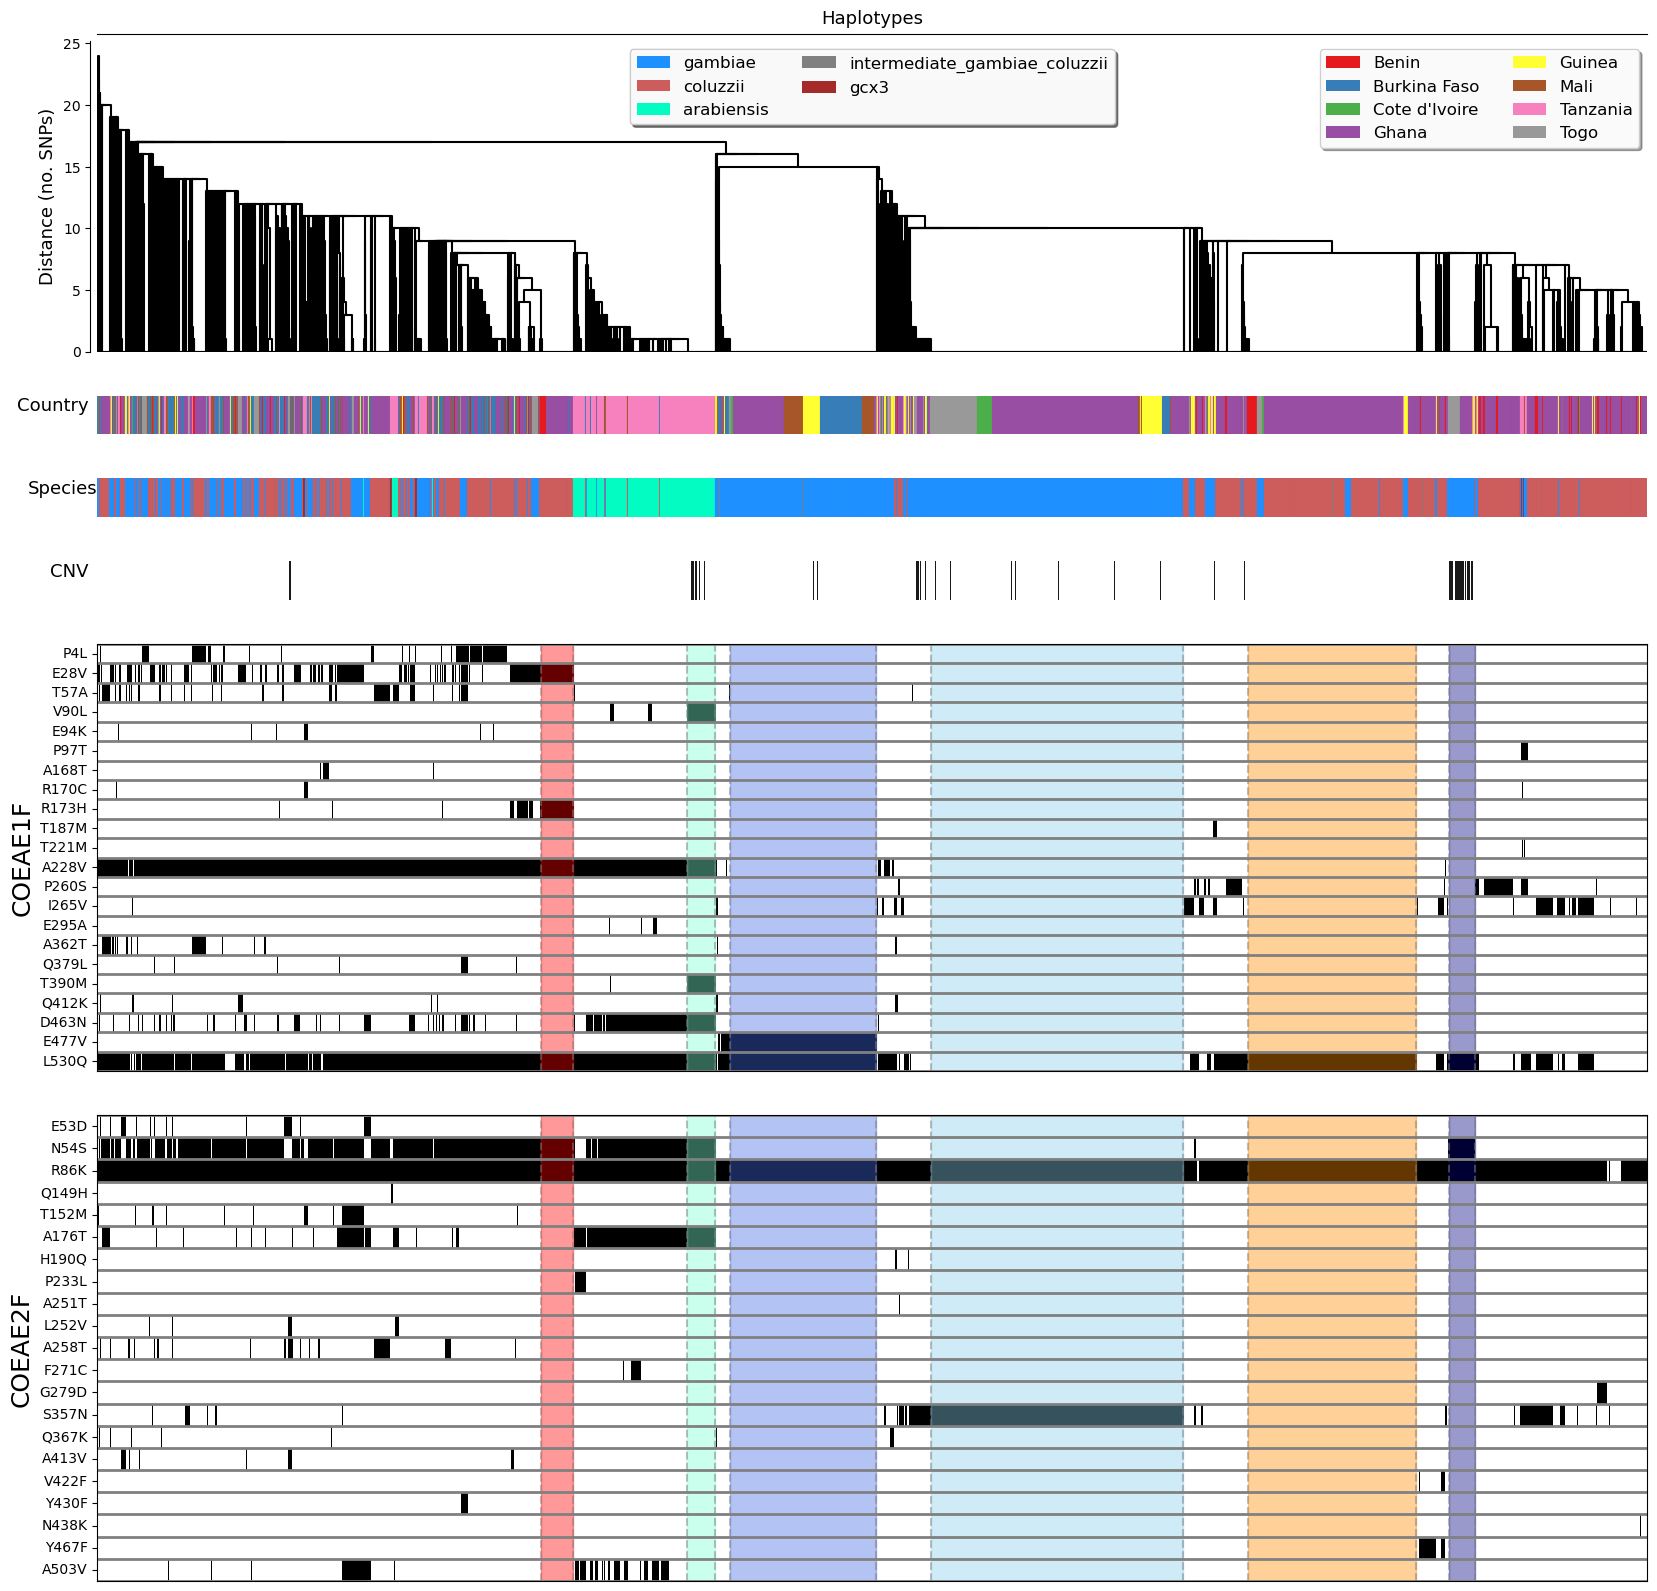

In [44]:
## Subplots and size ratios
fig, ax = plt.subplots(6,1, figsize=[20,20], gridspec_kw={'height_ratios': [8, 1, 1, 1, 11, 12]})

fig, ax_dend, ax_freq, cluster_spans, leaf2 = locusPocus.fig_haplotypes_clustered_dendro(haps, 
                                                          truncate_distance=0,
                                                          cut_height=1,
                                                          dpi=150, label_clusters=False, ax_dend=ax[0])

ax[0].set_ylabel("Distance (no. SNPs)", fontsize=13)
ax[0].set_xlabel("Haplotypes", fontsize=13)
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top')

for i, pop in enumerate(pop_order[pop_column]):
    ax[1].axvline(x=i, color=pop_colours[pop])
sns.despine(ax=ax[1], left=True, bottom=True)
ax[1].set_xlim(0, len(pop_order))

for i, sp in enumerate(sp_df['taxon']):
    ax[2].axvline(x=i, color=sp_df.loc[:, 'taxon'].iloc[i])
sns.despine(ax=ax[2], left=True, bottom=True)
ax[2].set_xlim(0, len(sp_df))
ax[2].set_yticks([])

for axes in ax[1:]:
    axes.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)

sns.heatmap(ax=ax[3], data=cnv.T, cmap='Greys', xticklabels="", cbar=None, alpha=0.9)
sns.heatmap(ax=ax[4], data=haps_df_227, cmap='Greys', cbar=None, xticklabels="")
sns.heatmap(ax=ax[5], data=haps_df_228, cmap='Greys', cbar=None, xticklabels="")

ax[1].tick_params(axis='y', which='both', left=False)
ax[2].tick_params(axis='y', which='both', left=False)
ax[3].tick_params(axis='y', which='both', left=False)

ax[1].set_ylabel('Country', rotation = 0, fontsize=13, loc='center', labelpad=25)
ax[1].set_yticklabels("")
ax[2].set_ylabel('Species', rotation = 0, fontsize=13, loc='center', labelpad=25)
ax[3].set_yticklabels("")
ax[3].set_yticks([])
ax[3].set_ylabel('CNV', rotation = 0, fontsize=13, loc='center', labelpad=20)
ax[3].set_yticklabels("")
ax[4].set_ylabel('COEAE1F', fontsize=18, loc='center')
ax[5].set_ylabel('COEAE2F', fontsize=18, loc='center')

for axes in ax[4], ax[5]:
    axes.set_yticks(axes.get_yticks())
    axes.set_yticklabels(axes.get_yticklabels(), rotation=0)
    for idx, span in enumerate(cluster_start_stop):
        start, stop = span
        axes.axvline(start, color='grey', linestyle="--", alpha=0.5)
        axes.axvline(stop, color='grey', linestyle="--", alpha=0.5)

        dend_patch_xy = (start, 0)
        axes.add_patch(plt.Rectangle(xy=dend_patch_xy,
                                           width=stop-start,
                                                height=40,
                                              color=palette[idx], alpha=0.4))

for i in range(haps_df_227.shape[0] + 1):
    ax[4].axhline(i, color='grey', lw=2)
for i in range(haps_df_228.shape[0] + 1):
    ax[5].axhline(i, color='grey', lw=2)
    
for axes in ax[4], ax[5]:
    for _, spine in axes.spines.items():
        spine.set_visible(True)
    
l = ax[0].legend(bars.values(), bars.keys(), loc='upper right', ncol=2, fancybox=True, shadow=True, framealpha=0.95, prop={'size':12})
ax[0].add_artist(l)

f = ax[0].legend(bars_sp.values(), bars_sp.keys(), loc='upper center', ncol=2, fancybox=True, shadow=True, framealpha=0.95, prop={'size':12})
ax[0].add_artist(f)

plt.savefig("../../figures/hapClusters.png", dpi=300)